# **Gradient Descent Method**

&copy; 2025, Aayush Raj Regmi

- **Gradient descent** is an optimization algorithm used to minimize a function by iteratively moving towards the steepest direction. 

- It is widely used in machine learning and deep learning for training models.

## Optimization Algorithm We Learn't so far

- **Ordinary Least Squares (OLS)**

**Question:**
1. What is the main goal of OLS?

2. What does it minimize?

3. How does it work?

## **Question:**

#### How many iterations does OLS require to converge?

## Gradient Descent Algorithm

### Why use Gradient Descent if we have OLS?

- Remember if you put in the values of $X$ and $y$ in the normal equation and perform some finite number of operations, you will get the optimal values of the parameters **in a single iteration**.

- **OLS is an non-iterative** approach for optimization

- The inverse operation, $(X^TX)^{-1}$ is computationally very expensive

- The time complexity of this operation increases significantly with the increase in number of features. 

- So for a large dataset with a large number of features, OLS becomes computationally expensive and infeasible.

### But how does **Gradient Descent** Work?


Step 1: Initialize the value of ${x}$ randomly

Step 2: Calculate the gradient of $f({x})$ with respect to ${x}$ ie.  $\frac{\partial\ f({x})}{\partial\ {x}}$

Step 3: Update ${x}$ as:

$${x} := {x} - \alpha \frac{\partial\ f({x})}{\partial\ {x}}$$

$\hspace{1cm}$ where, $\alpha$ is the **learning rate** and '$:=$' is assignment operator 


Step 4: Repeat steps 1, 2 and 3 until the value of $f({x})$ converges to the minimum value.


As the function approaches the minimum point, its gradient approaches zero and so the updates don't change $x$ much. At the minimum point of the function,  $\frac{\partial\ f({x})}{\partial\ {x}}\cong0$ and the solution converges at that point after certain number of iterations.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('seaborn-v0_8')  # Use a valid style


In [5]:
history = dict()


def gradient_descent(
    f, df, x0, learning_rate=0.01, tolerance=1e-6, max_iterations=1000
):
    """
    Perform gradient descent to minimize the function f.

    Parameters:
    - f: The function to minimize.
    - df: The derivative of the function f.
    - x0: Initial guess for the minimum.
    - learning_rate: Step size for each iteration.
    - tolerance: Threshold for convergence.
    - max_iterations: Maximum number of iterations.

    Returns:
    - x: The estimated minimum point.
    """
    x = x0
    history["x"] = [x0]
    history["iterations"] = [0]
    history["cost"] = [f(x0)]
    for i in range(max_iterations):
        grad = df(x)
        x_new = x - learning_rate * grad
        history["x"].append(x_new)
        history["iterations"].append(i+1)
        history["cost"].append(f(x_new))
        if abs(x_new - x) < tolerance:
            break

        print(f"Iteration {i}: (Initial) X = {x:.6f}")
        x = x_new

    return x, i

In [6]:
def f(x):
    return x**2 + 4*x + 4  # Example function
def df(x):
    return 2*x + 4  # Derivative of the function

Iteration 0: (Initial) X = 0.000000
Iteration 1: (Initial) X = -0.400000
Iteration 2: (Initial) X = -0.720000
Iteration 3: (Initial) X = -0.976000
Iteration 4: (Initial) X = -1.180800
Iteration 5: (Initial) X = -1.344640
Iteration 6: (Initial) X = -1.475712
Iteration 7: (Initial) X = -1.580570
Iteration 8: (Initial) X = -1.664456
Iteration 9: (Initial) X = -1.731565
Iteration 10: (Initial) X = -1.785252
Iteration 11: (Initial) X = -1.828201
Iteration 12: (Initial) X = -1.862561
Iteration 13: (Initial) X = -1.890049
Iteration 14: (Initial) X = -1.912039
Iteration 15: (Initial) X = -1.929631
Iteration 16: (Initial) X = -1.943705
Iteration 17: (Initial) X = -1.954964
Iteration 18: (Initial) X = -1.963971
Iteration 19: (Initial) X = -1.971177
Iteration 20: (Initial) X = -1.976942
Iteration 21: (Initial) X = -1.981553
Iteration 22: (Initial) X = -1.985243
Iteration 23: (Initial) X = -1.988194
Iteration 24: (Initial) X = -1.990555
Iteration 25: (Initial) X = -1.992444
Iteration 26: (Initial)

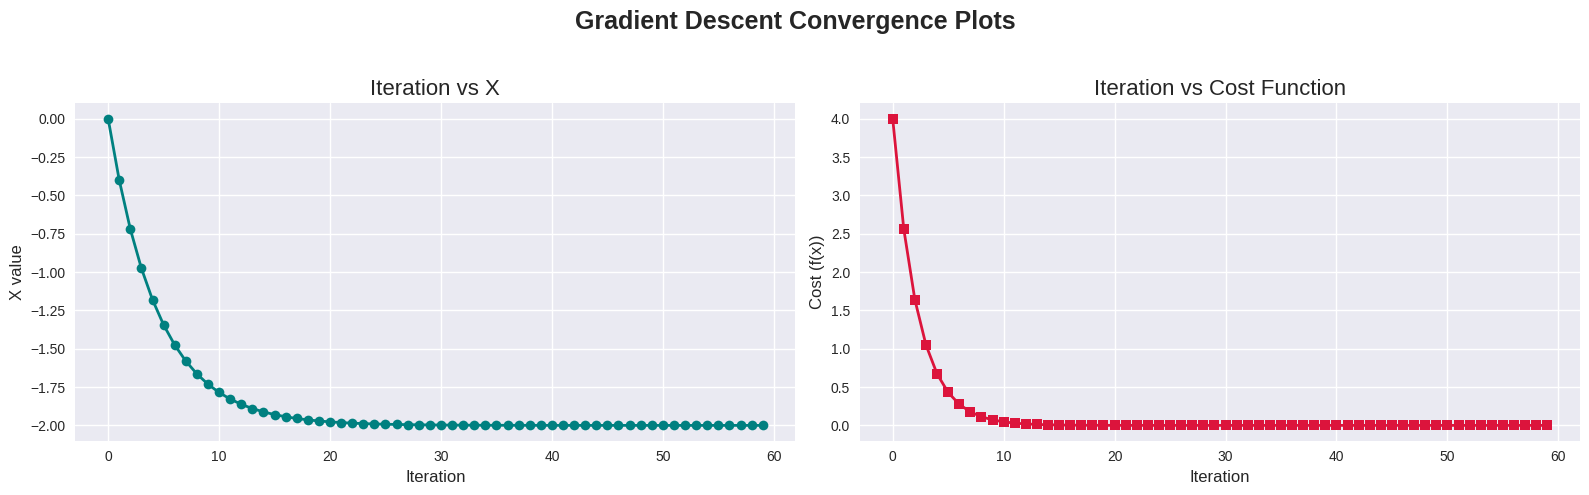

In [ ]:
x0 = 10000  # Initial guess
minimum, iteration = gradient_descent(f, df, x0, learning_rate=0.1, max_iterations=2000)
print(f"The minimum point is at Iteration {iteration}: x = {minimum}")


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot: Iteration vs X
axes[0].plot(history['iterations'], history['x'], color='teal', marker='o', linewidth=2)
axes[0].set_title("Iteration vs X", fontsize=16)
axes[0].set_xlabel("Iteration", fontsize=12)
axes[0].set_ylabel("X value", fontsize=12)
axes[0].grid(True)

# Plot: Iteration vs Cost
axes[1].plot(history['iterations'], history['cost'], color='crimson', marker='s', linewidth=2)
axes[1].set_title("Iteration vs Cost Function", fontsize=16)
axes[1].set_xlabel("Iteration", fontsize=12)
axes[1].set_ylabel("Cost (f(x))", fontsize=12)
axes[1].grid(True)

plt.suptitle("Gradient Descent Convergence Plots", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [178]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Iteration vs X", "Iteration vs Cost")
)

fig.add_trace(
    go.Scatter(x=history["iterations"], y=history["x"], mode="lines+markers", name="X"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=history["iterations"], y=history["cost"], mode="lines+markers", name="Cost"
    ),
    row=1,
    col=2,
)

fig.update_layout(title_text="Gradient Descent Progress", width=1400, height=600)
fig.show()


## Key Takeaways

* Gradient of the cost function w.r.t each of the parameters can be derived easily using calculus.

* The parameters are updated iteratively using their corresponding gradients.

* When the dataset is large with a large number of features, Gradient descent is preferred instead of OLS of the function.


&copy; 2025, Aayush Raj Regmi